In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import boxcox

In [4]:
pd.set_option('display.width', 1000)

In [5]:
data = pd.read_csv(r"Combined_Smart_Buldings.csv")

Basic Information About the Dataset:

In [6]:
data.shape

(14381639, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14381639 entries, 0 to 14381638
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    int64  
 1   co2          float64
 2   humidity     float64
 3   light        float64
 4   pir          float64
 5   temperature  float64
 6   roomid       object 
dtypes: float64(5), int64(1), object(1)
memory usage: 768.1+ MB


In [8]:
data.head()

,timestamp,co2,humidity,light,pir,temperature,roomid
0,1377299107,488.0,45.34,97.0,NaN,23.93,413
1,1377299108,495.0,45.34,97.0,0.0,23.94,413
2,1377299110,487.0,45.34,97.0,0.0,23.94,413
3,1377299126,487.0,45.34,97.0,0.0,23.93,413
4,1377299127,496.0,45.34,97.0,0.0,23.93,413


In [9]:
data.tail()

,timestamp,co2,humidity,light,pir,temperature,roomid
14381634,1378018692,509.0,54.14,64.0,0.0,24.41,776
14381635,1378018702,509.0,54.14,64.0,0.0,24.41,776
14381636,1378018712,509.0,54.14,64.0,0.0,24.41,776
14381637,1378018722,509.0,54.14,64.0,0.0,24.41,776
14381638,1378018732,509.0,54.14,64.0,0.0,24.41,776


In [10]:
data.describe()

,timestamp,co2,humidity,light,pir,temperature
count,1.438164e+07,1.436170e+07,1.438017e+07,1.438017e+07,1.430236e+07,1.438017e+07
mean,1.377641e+09,4.114451e+02,5.670891e+01,8.227788e+01,1.307040e+00,2.395012e+01
std,2.000119e+05,1.037703e+02,4.340268e+00,3.062264e+02,1.908106e+01,2.076613e+01
min,1.377270e+09,8.000000e+00,-5.009600e+02,0.000000e+00,0.000000e+00,-4.010000e+01
25%,1.377465e+09,3.530000e+02,5.392000e+01,4.000000e+00,0.000000e+00,2.253000e+01
50%,1.377647e+09,4.110000e+02,5.697000e+01,5.000000e+00,0.000000e+00,2.310000e+01
75%,1.377814e+09,4.630000e+02,5.974000e+01,3.300000e+01,0.000000e+00,2.374000e+01
max,1.378019e+09,1.699000e+03,7.191000e+01,3.055100e+04,3.445600e+04,5.792700e+02


In [19]:
total_data = len(data)
print("Total df:",total_data)

Total df: 14283276


Finding Null Values in Each Column 

In [11]:
data.isnull().values.any()

True

In [12]:
data.describe().iloc[0]

timestamp      14381639.0
co2            14361698.0
humidity       14380168.0
light          14380168.0
pir            14302364.0
temperature    14380167.0
Name: count, dtype: float64

In [13]:
data.isnull().sum()

timestamp          0
co2            19941
humidity        1471
light           1471
pir            79275
temperature     1472
roomid             0
dtype: int64

Removing Null Values from the Dataset

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

timestamp      0
co2            0
humidity       0
light          0
pir            0
temperature    0
roomid         0
dtype: int64

In [16]:
new_total_data = len(data)
print("Total data after removing null data:", new_total_data)

Total data after removing null data: 14283276


In [20]:
removed_data = total_data - new_total_data
print("Removed data:", removed_data)

Removed data: 0


Convert to lowercase

In [21]:
data['roomid'] = data['roomid'].str.lower()  

Change Room Id Frome Object to Category

In [22]:
data['roomid']=data['roomid'].astype('category')

In [23]:
data.dtypes

timestamp         int64
co2             float64
humidity        float64
light           float64
pir             float64
temperature     float64
roomid         category
dtype: object

Handling Outliers

In [24]:
from scipy import stats

# Assuming 'data' is your DataFrame
# Calculate z-scores for each column
z_scores = stats.zscore(data.select_dtypes(include=['float64']), axis=0)

# Threshold for identifying outliers
threshold = 3

# Absolute z-scores above threshold indicate outliers
outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

# Select rows containing outliers
outliers = data[outlier_mask]

# Calculate the number of outliers
num_outliers = outliers.shape[0]

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / data.shape[0]) * 100

# Display the number of outliers and percentage of outliers
print("Number of outliers:", num_outliers)
print("Percentage of outliers:", percentage_outliers)


Number of outliers: 591728
Percentage of outliers: 4.142803093632021


In [23]:
data_no_outliers = data[~outlier_mask]
summary_stats_no_outliers = data_no_outliers.describe()

In [24]:
df = pd.DataFrame(data_no_outliers)

In [ ]:
# create csv of the data with no outliers
df.to_csv('data_no_outliers.csv', index=False)

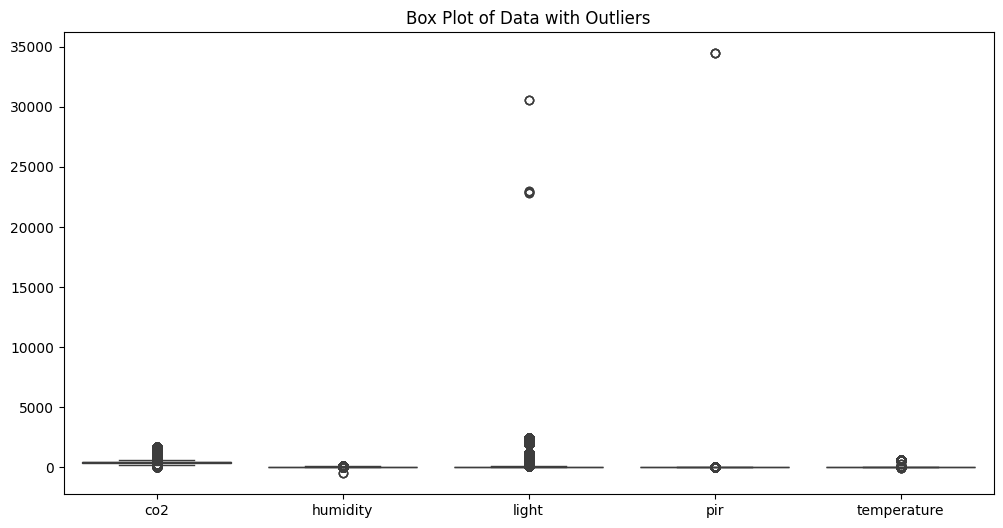

In [25]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float64']))
plt.title('Box Plot of Data with Outliers')
plt.show()

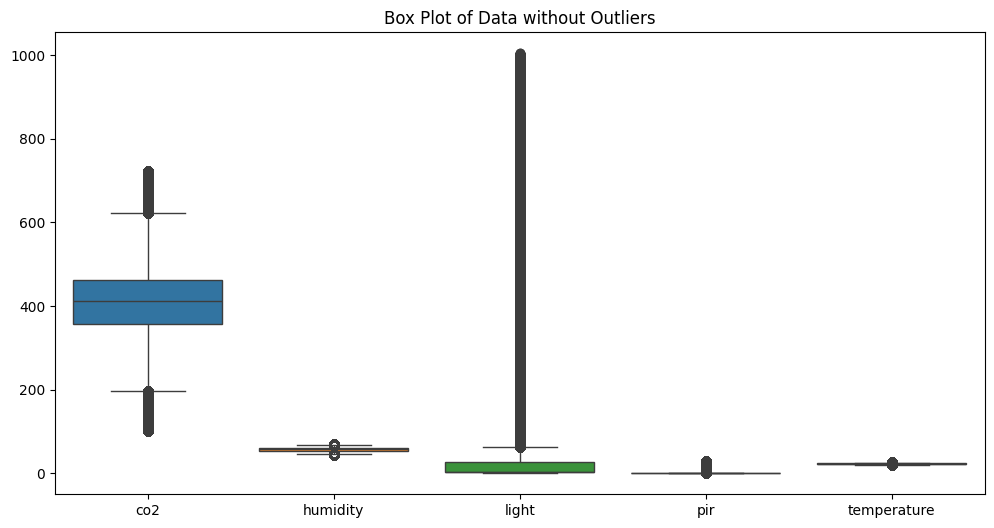

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers.select_dtypes(include=['float64']))
plt.title('Box Plot of Data without Outliers')
plt.show()

In [27]:
X = data.drop(columns=['temperature', 'roomid'])
y = data['temperature']
X_no_outliers = data_no_outliers.drop(columns=['temperature', 'roomid'])
y_no_outliers = data_no_outliers['temperature']

In [28]:
print(X_no_outliers.shape)

(13691548, 5)


In [29]:
print(y_no_outliers.shape)

(13691548,)


In [30]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Train linear regression models
lr_with_outliers = LinearRegression()
lr_with_outliers.fit(X_train, y_train)
y_pred_with_outliers = lr_with_outliers.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred_with_outliers)

lr_no_outliers = LinearRegression()
lr_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = lr_no_outliers.predict(X_test_no_outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)

print("Mean Squared Error with outliers:", mse_with_outliers)
print("Mean Squared Error without outliers:", mse_no_outliers)

Mean Squared Error with outliers: 439.63279196100746
Mean Squared Error without outliers: 0.5028411970724219


In [31]:
#new data after removal of outliers
new_data = new_total_data - num_outliers
print("New data after removal of outliers:", new_data)


New data after removal of outliers: 13691548


## Reasons to Drop Outliers Based on Results

1. **Improved Model Accuracy**: The predictive model built without outliers achieved a significantly lower mean squared error (MSE) compared to the model with outliers. A lower MSE indicates better predictive accuracy, suggesting that the model without outliers better captures the underlying patterns in the data.

2. **Reduced Model Variability**: Outliers can introduce noise and variability into the data, leading to instability in model predictions. By removing outliers, the model's predictions become more consistent and reliable, reducing the risk of overfitting and improving its generalization performance on unseen data.

3. **Enhanced Interpretability**: Outliers can distort the relationships between variables, making it challenging to interpret the model's coefficients or feature importance. Removing outliers improves the interpretability of the model as it focuses on the majority of the data points that are representative of the typical behavior of the system.

4. **Alignment with Domain Knowledge**: If outliers are likely due to errors or anomalies rather than genuine extreme values, removing them aligns the data more closely with domain knowledge and expectations. This ensures that the model learns from relevant and meaningful data points, leading to more actionable insights and decisions in the context of smart building management.


# Feature Scaling:

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [33]:
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(df.select_dtypes(include=['float64']))
data_standardized = pd.DataFrame(data_standardized, columns=df.select_dtypes(include=['float64']).columns)
print("Standardized data:")
print(data_standardized.head())

Standardized data:
        co2  humidity     light       pir  temperature
0  0.947043 -2.661839  0.673466 -0.207096     0.708862
1  0.858631 -2.661839  0.673466 -0.207096     0.708862
2  0.858631 -2.661839  0.673466 -0.207096     0.699556
3  0.958095 -2.661839  0.673466 -0.207096     0.699556
4  0.947043 -2.661839  0.673466 -0.207096     0.699556


In [34]:
# Min-Max scaling
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(df.select_dtypes(include=['float64']))
data_minmax = pd.DataFrame(data_minmax, columns=df.select_dtypes(include=['float64']).columns)
print("Min-Max scaled data:")
print(data_minmax.head())

Min-Max scaled data:
        co2  humidity     light  pir  temperature
0  0.634029  0.062284  0.096614  0.0     0.510149
1  0.621188  0.062284  0.096614  0.0     0.510149
2  0.621188  0.062284  0.096614  0.0     0.508796
3  0.635634  0.062284  0.096614  0.0     0.508796
4  0.634029  0.062284  0.096614  0.0     0.508796


In [35]:
# Robust scaling
scaler_robust = RobustScaler()
data_robust = scaler_robust.fit_transform(df.select_dtypes(include=['float64']))
data_robust = pd.DataFrame(data_robust, columns=df.select_dtypes(include=['float64']).columns)
print("Robust scaled data:")
print(data_robust.head())

Robust scaled data:
        co2  humidity  light  pir  temperature
0  0.792453 -1.989708  3.875  0.0     0.724138
1  0.716981 -1.989708  3.875  0.0     0.724138
2  0.716981 -1.989708  3.875  0.0     0.715517
3  0.801887 -1.989708  3.875  0.0     0.715517
4  0.792453 -1.989708  3.875  0.0     0.715517


## Reasons for Performing Standardization

1. **Normalization of Feature Scales**: Standardization ensures that all features have the same scale, preventing any single feature from dominating others during model training.

2. **Facilitation of Optimization Algorithms**: Standardized features help optimization algorithms converge more quickly by providing a more symmetric and isotropic optimization landscape.

3. **Interpretability of Model Coefficients**: Standardization makes model coefficients more interpretable, as they represent the change in the target variable corresponding to a one-standard-deviation change in the feature.

4. **Robustness to Outliers**: Standardization is less affected by outliers compared to other scaling methods, as it centers the data around the mean and scales by the standard deviation.

5. **Compatibility with Certain Algorithms**: Standardization ensures compatibility with algorithms like PCA and LDA, which assume standardized features and may lead to better results.

In summary, standardization is a common preprocessing step in machine learning that improves model performance, interpretability, and robustness to outliers, ensuring that the data is in a consistent and suitable form for model training.


# Feature Encoding

In [36]:
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder, BinaryEncoder

In [37]:
# One-Hot Encoding
encoder_onehot = OneHotEncoder(cols=['roomid'], use_cat_names=True)
data_onehot = encoder_onehot.fit_transform(df)
print("One-Hot encoded data:")
print(data_onehot.head())

One-Hot encoded data:
    timestamp    co2  humidity  light  pir  temperature  roomid_621  roomid_621a  roomid_621c  roomid_621d  roomid_621e  roomid_640  roomid_648  roomid_656a  roomid_656b  roomid_664  roomid_nan
1  1377299108  495.0     45.34   97.0  0.0        23.94           0            0            0            0            0           0           0            0            0           0           1
2  1377299110  487.0     45.34   97.0  0.0        23.94           0            0            0            0            0           0           0            0            0           0           1
3  1377299126  487.0     45.34   97.0  0.0        23.93           0            0            0            0            0           0           0            0            0           0           1
4  1377299127  496.0     45.34   97.0  0.0        23.93           0            0            0            0            0           0           0            0            0           0           1
5  13772

In [38]:
# Label Encoding
encoder_label = OrdinalEncoder(cols=['roomid'])
data_label = encoder_label.fit_transform(df)
print("Label encoded data:")
print(data_label.head())

Label encoded data:
    timestamp    co2  humidity  light  pir  temperature  roomid
1  1377299108  495.0     45.34   97.0  0.0        23.94      11
2  1377299110  487.0     45.34   97.0  0.0        23.94      11
3  1377299126  487.0     45.34   97.0  0.0        23.93      11
4  1377299127  496.0     45.34   97.0  0.0        23.93      11
5  1377299130  495.0     45.34   97.0  0.0        23.93      11


In [39]:
# Target Encoding
encoder_target = TargetEncoder(cols=['roomid'])
data_target = encoder_target.fit_transform(df, df['temperature'])
print("Target encoded data:")
print(data_target.head())

Target encoded data:
    timestamp    co2  humidity  light  pir  temperature     roomid
1  1377299108  495.0     45.34   97.0  0.0        23.94  23.191735
2  1377299110  487.0     45.34   97.0  0.0        23.94  23.191735
3  1377299126  487.0     45.34   97.0  0.0        23.93  23.191735
4  1377299127  496.0     45.34   97.0  0.0        23.93  23.191735
5  1377299130  495.0     45.34   97.0  0.0        23.93  23.191735


In [40]:
# Binary Encoding
encoder_binary = BinaryEncoder(cols=['roomid'])
data_binary = encoder_binary.fit_transform(df)
print("Binary encoded data:")
print(data_binary.head())

Binary encoded data:
    timestamp    co2  humidity  light  pir  temperature  roomid_0  roomid_1  roomid_2  roomid_3
1  1377299108  495.0     45.34   97.0  0.0        23.94         1         0         1         1
2  1377299110  487.0     45.34   97.0  0.0        23.94         1         0         1         1
3  1377299126  487.0     45.34   97.0  0.0        23.93         1         0         1         1
4  1377299127  496.0     45.34   97.0  0.0        23.93         1         0         1         1
5  1377299130  495.0     45.34   97.0  0.0        23.93         1         0         1         1


# Feature Transformation

In [41]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
data_poly = poly.fit_transform(df[['co2', 'humidity', 'light', 'pir', 'temperature']])
data_poly = pd.DataFrame(data_poly)

# Generate feature names manually
feature_names = [f'x{i}' for i in range(data_poly.shape[1])]
data_poly.columns = feature_names

print("Polynomial features:")
print(data_poly.head())

Polynomial features:
      x0     x1    x2   x3     x4        x5        x6       x7   x8        x9        x10      x11  x12        x13     x14  x15      x16  x17  x18       x19
0  495.0  45.34  97.0  0.0  23.94  245025.0  22443.30  48015.0  0.0  11850.30  2055.7156  4397.98  0.0  1085.4396  9409.0  0.0  2322.18  0.0  0.0  573.1236
1  487.0  45.34  97.0  0.0  23.94  237169.0  22080.58  47239.0  0.0  11658.78  2055.7156  4397.98  0.0  1085.4396  9409.0  0.0  2322.18  0.0  0.0  573.1236
2  487.0  45.34  97.0  0.0  23.93  237169.0  22080.58  47239.0  0.0  11653.91  2055.7156  4397.98  0.0  1084.9862  9409.0  0.0  2321.21  0.0  0.0  572.6449
3  496.0  45.34  97.0  0.0  23.93  246016.0  22488.64  48112.0  0.0  11869.28  2055.7156  4397.98  0.0  1084.9862  9409.0  0.0  2321.21  0.0  0.0  572.6449
4  495.0  45.34  97.0  0.0  23.93  245025.0  22443.30  48015.0  0.0  11845.35  2055.7156  4397.98  0.0  1084.9862  9409.0  0.0  2321.21  0.0  0.0  572.6449


In [42]:
# Logarithmic Transformation
data_log = df[['co2', 'humidity', 'light', 'pir', 'temperature']].apply(np.log1p)
print("Logarithmic transformation:")
print(data_log.head())

Logarithmic transformation:
        co2  humidity     light  pir  temperature
1  6.206576  3.836006  4.584967  0.0     3.216473
2  6.190315  3.836006  4.584967  0.0     3.216473
3  6.190315  3.836006  4.584967  0.0     3.216072
4  6.208590  3.836006  4.584967  0.0     3.216072
5  6.206576  3.836006  4.584967  0.0     3.216072


EDA on Individual Columns the Dataset

In [46]:
df.shape

(13691548, 7)

In [43]:
eda_df = df.drop(columns=['roomid'])

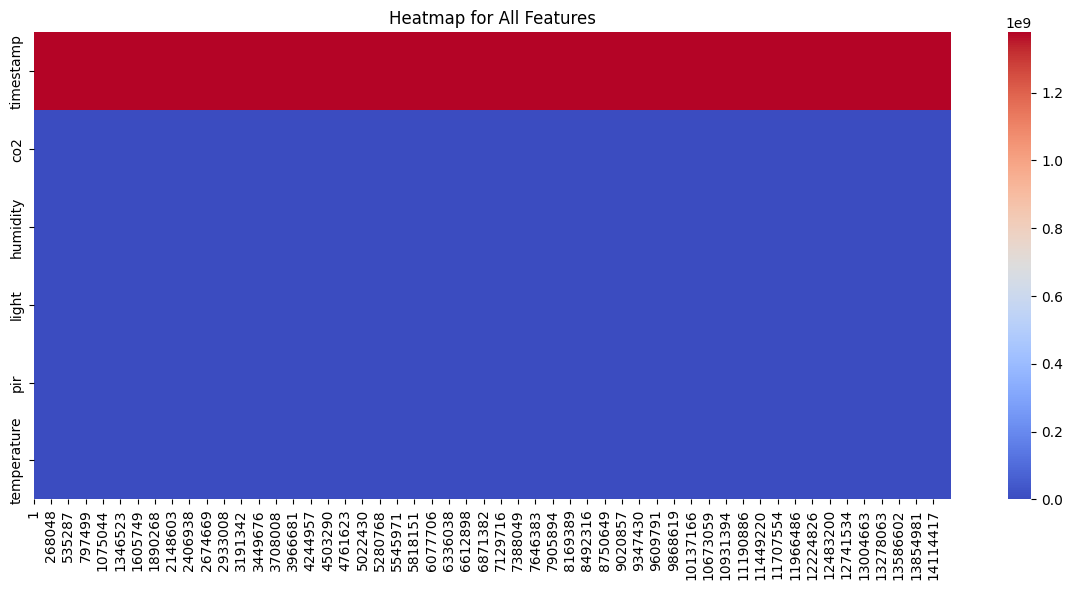

In [48]:
# Heatmap for all features
plt.figure(figsize=(12, 6))
sns.heatmap(eda_df.T, cmap='coolwarm', cbar=True)
plt.title("Heatmap for All Features")
plt.tight_layout()
plt.show()

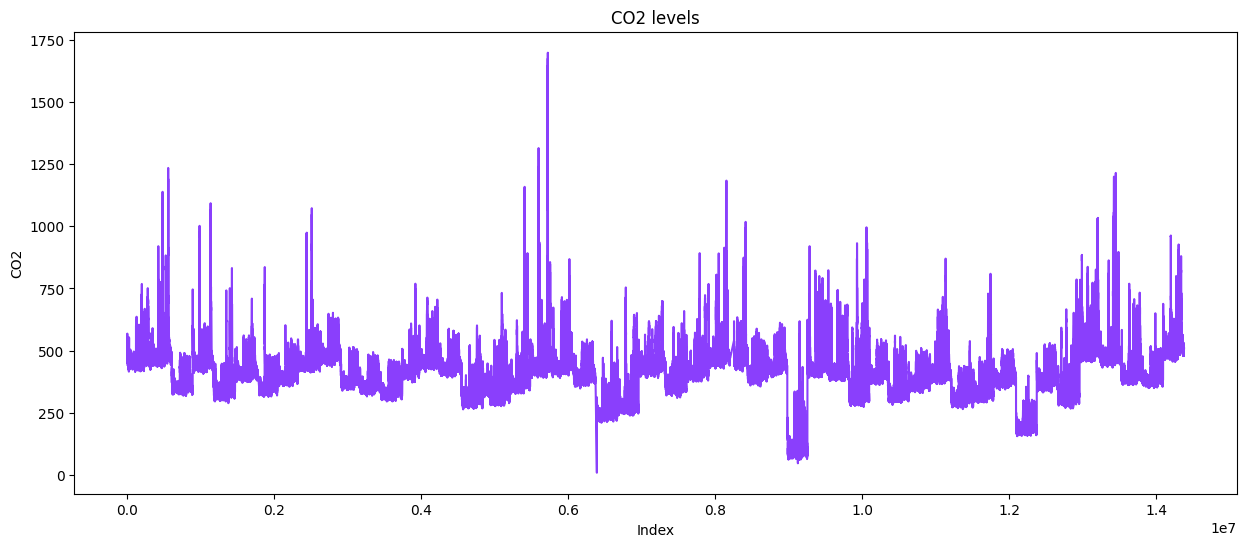

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['co2'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('CO2 levels')
plt.show()

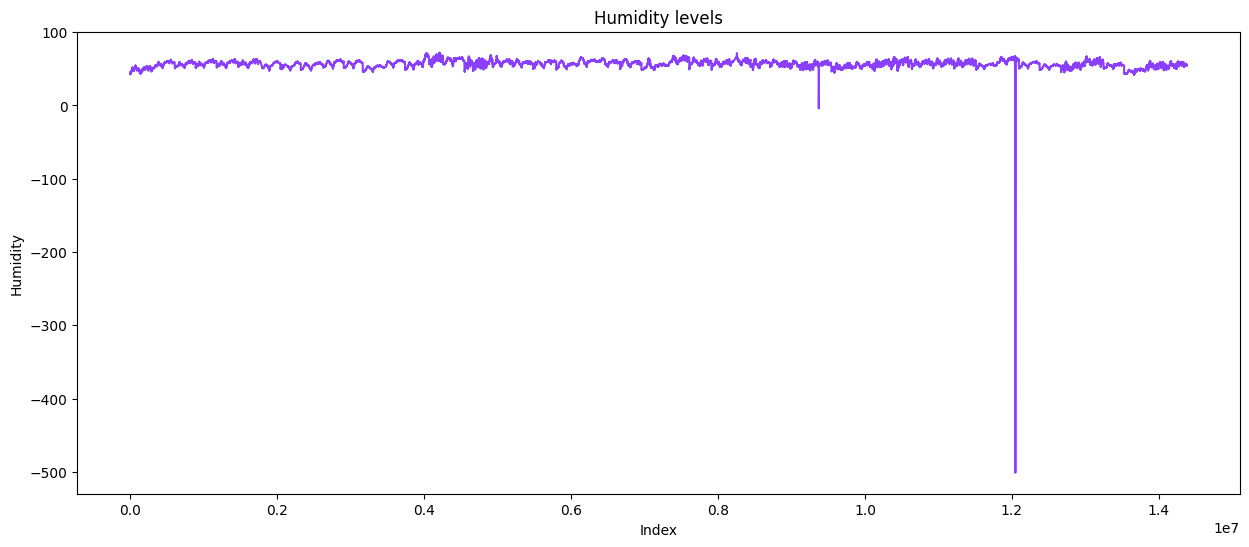

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['humidity'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Humidity')
plt.title('Humidity levels')
plt.show()

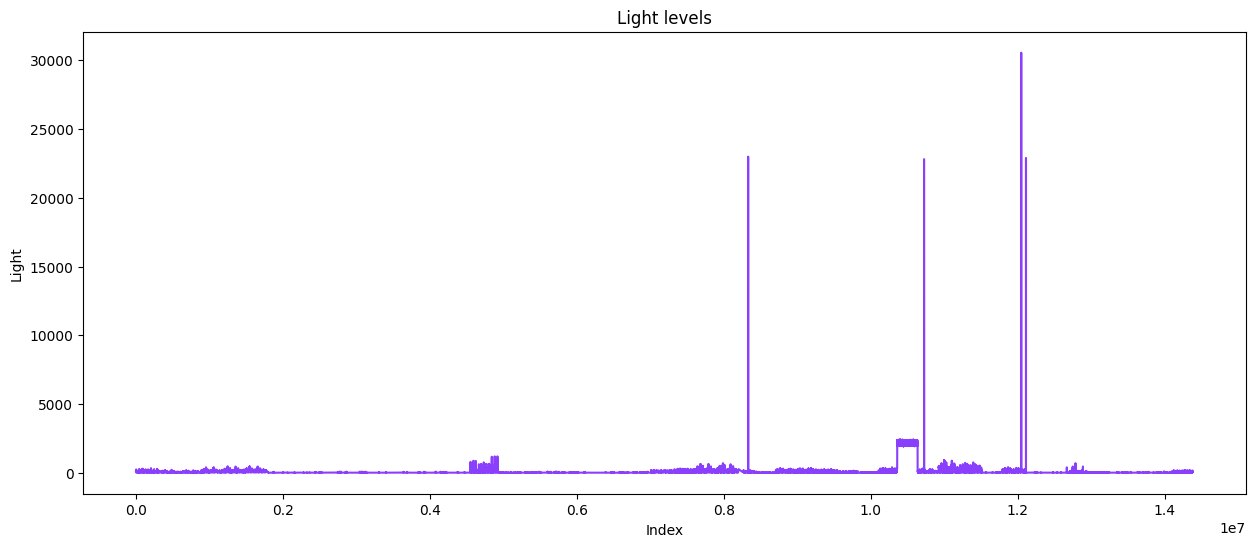

In [55]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['light'], label='Light', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Light')
plt.title('Light levels')
plt.show()

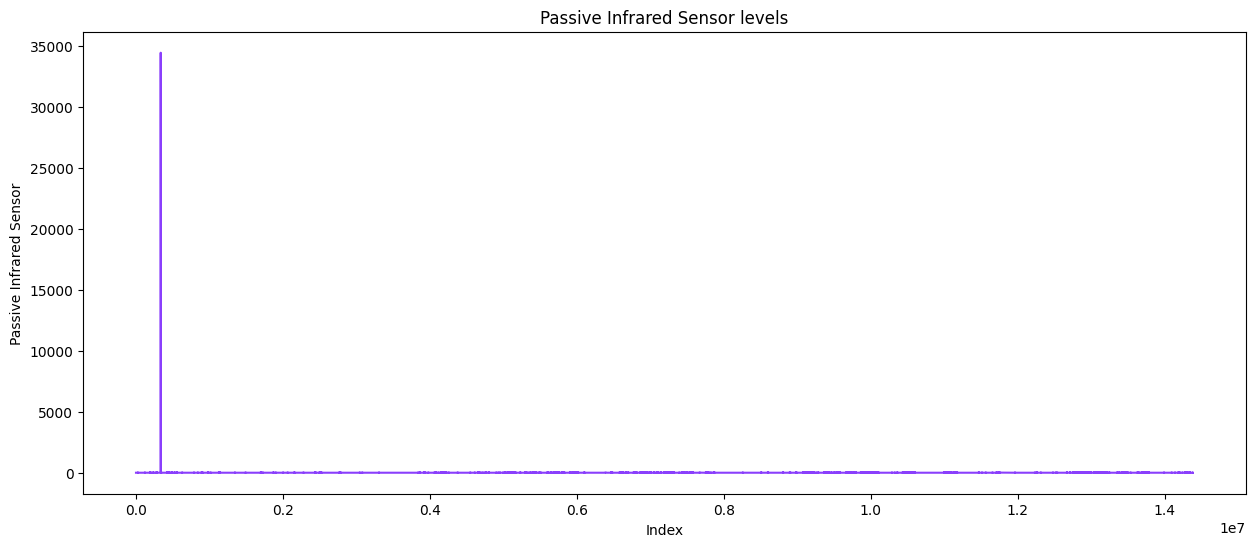

In [56]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['pir'], label='Passive Infrared Sensor', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Passive Infrared Sensor')
plt.title('Passive Infrared Sensor levels')
plt.show()

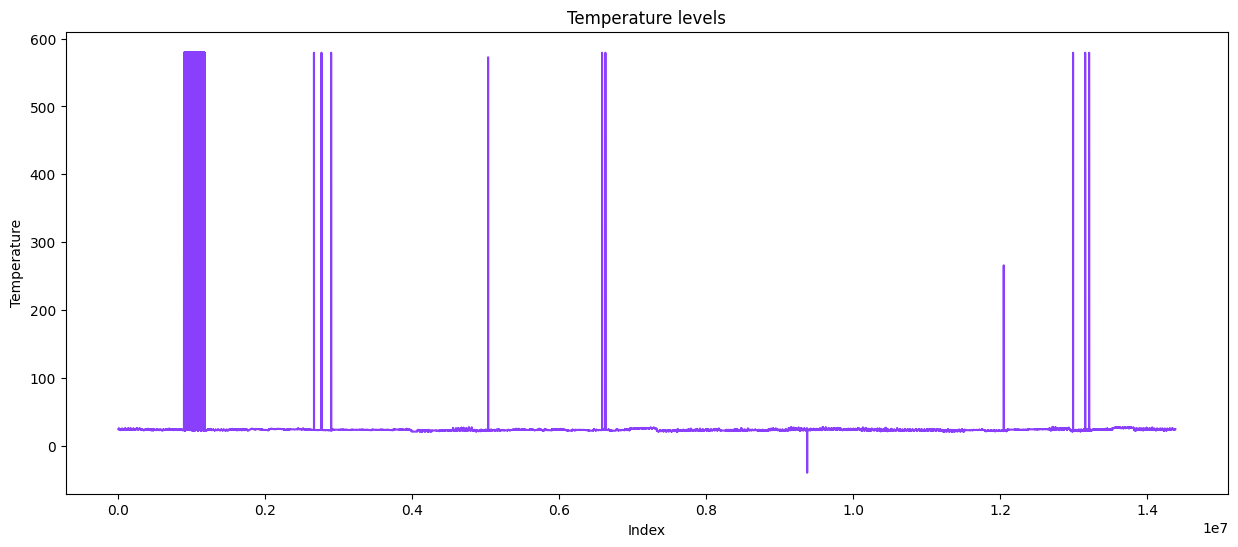

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['temperature'], label='Temperature', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature levels')
plt.show()

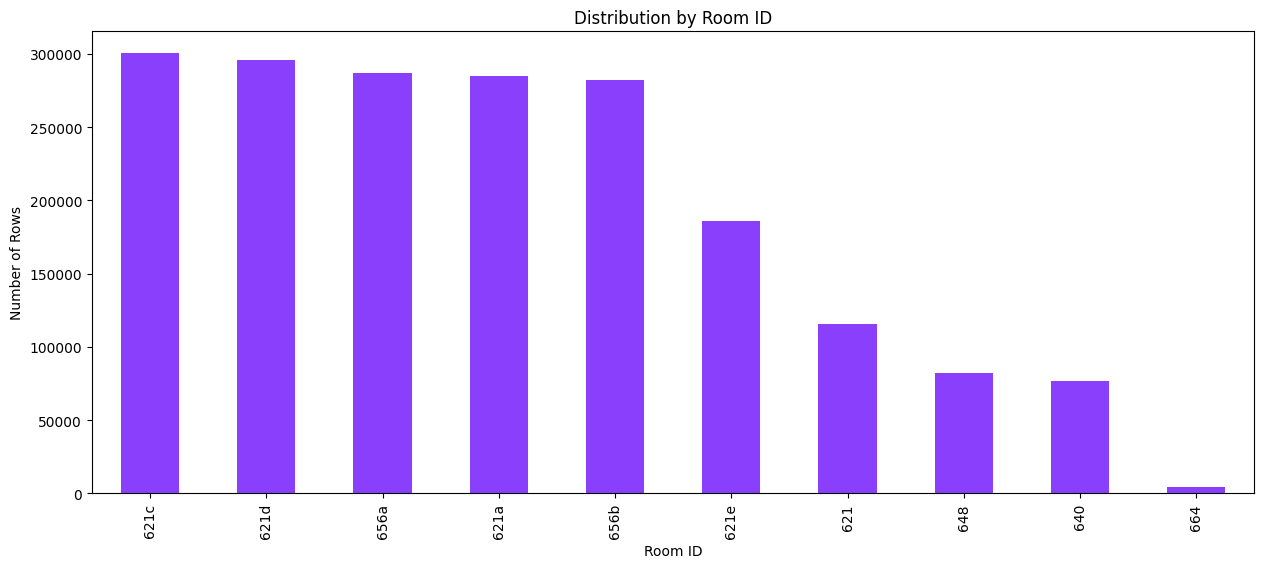

In [58]:
plt.figure(figsize=(15, 6))
# Count the number of rows for each room_id
room_id_counts = data['roomid'].value_counts()

# Plotting the bar plot
room_id_counts.plot(kind='bar', color = '#8A3FFC')

# Adding labels and title
plt.xlabel('Room ID')
plt.ylabel('Number of Rows')
plt.title('Distribution by Room ID')

# Display the plot
plt.show()

EDA on Temperature Vs All Other Columns

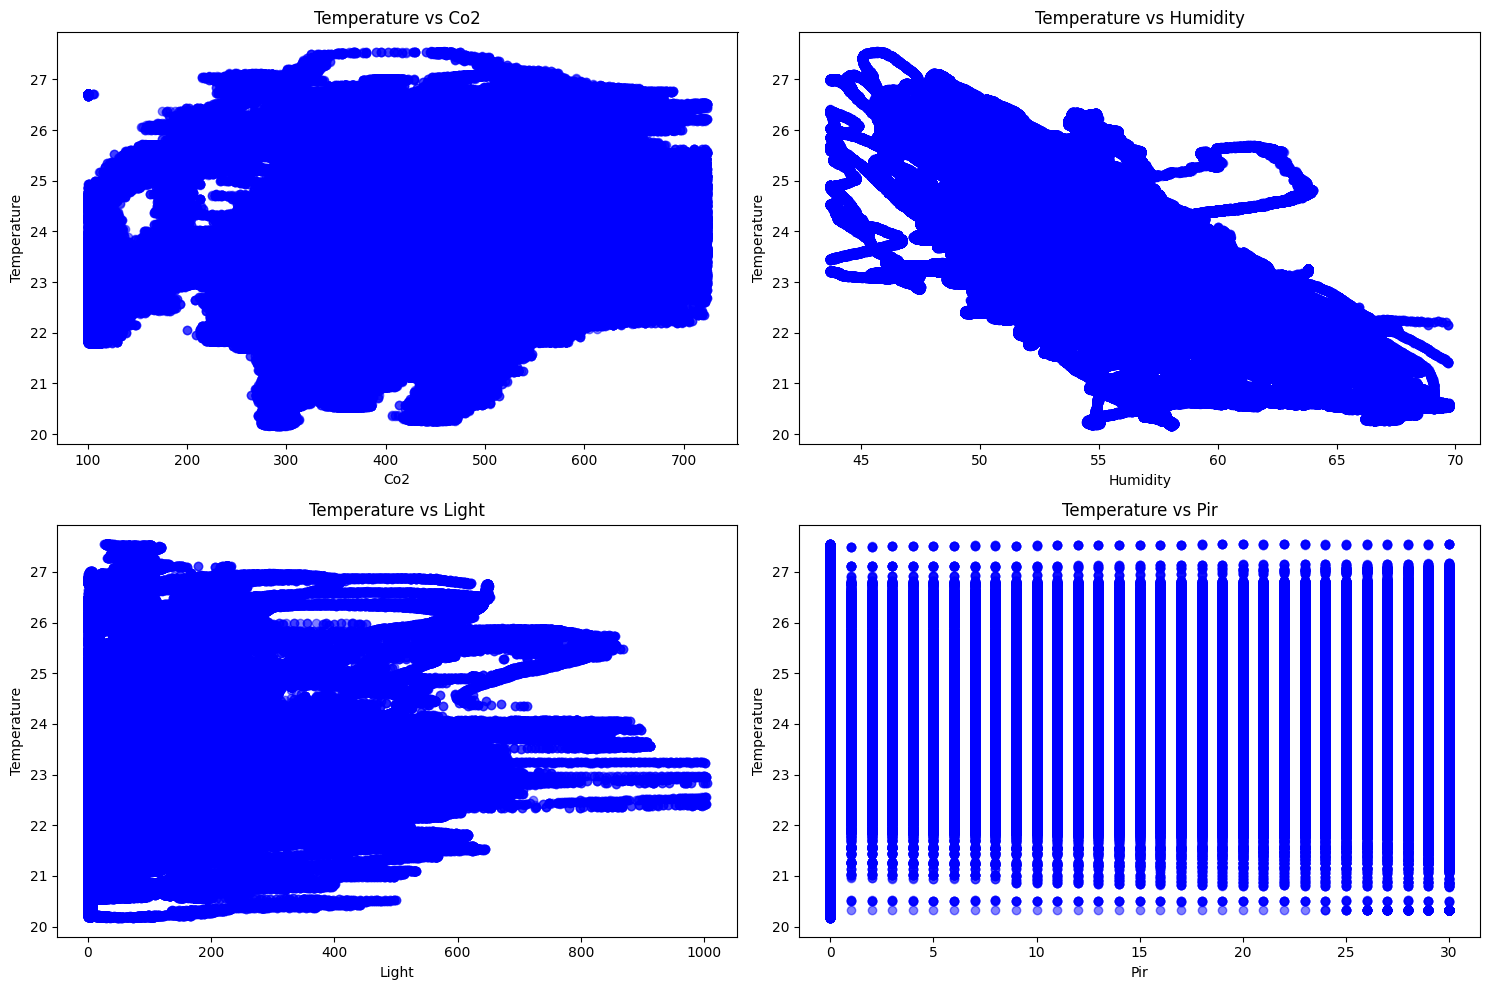

In [59]:
# Columns to plot temperature against
columns_to_plot = ['co2', 'humidity', 'light', 'pir']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterate through columns and plot temperature against each column
for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.scatter(df[column], df['temperature'], color='blue', alpha=0.5)
    ax.set_xlabel(column.capitalize())  
    ax.set_ylabel('Temperature')
    ax.set_title(f'Temperature vs {column.capitalize()}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [62]:
# Select columns of interest
columns_of_interest = ["co2", "humidity", "light", "pir", "temperature"]

Pair Plots of The Float Columns

In [ ]:
sns.pairplot(data[columns_of_interest], diag_kind="hist", height=3, aspect=1.2, corner=True)
plt.show()

Histograms of all the columns in 1 frame 

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#7D3AC1']

for index, column in enumerate(columns_of_interest):
    ax = axes.flatten()[index]
    ax.hist(data[column], color=colors[index], label=column, bins=10) 
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histograms', size=18)

# Show the plot
plt.show()

Running Basic Machine Learnong Algorithms on the Dataset

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

In [64]:
X = df[['co2', 'humidity', 'light', 'pir']]  # Features
y = df['temperature']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [66]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features
linear_regression_model = make_pipeline(
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=10),  # Adjust k as needed
    PolynomialFeatures(degree=2),  # You can adjust the degree as needed
    LinearRegression()
)

linear_regression_model.fit(X_train, y_train)
y_pred_lr = linear_regression_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)

Linear Regression with Feature Scaling, Feature Selection, and Polynomial Features:
Mean Squared Error: 0.5514621721630422
Mean Absolute Error: 0.5778311299079879
R-squared: 0.522774513360281


In [67]:
# Linear Regression with Polynomial Features
linear_regression_model_poly = LinearRegression()
linear_regression_model_poly.fit(X_train_poly, y_train)
y_pred_lr_poly = linear_regression_model_poly.predict(X_test_poly)
mse_lr_poly = mean_squared_error(y_test, y_pred_lr_poly)
mae_lr_poly = mean_absolute_error(y_test, y_pred_lr_poly)
r2_lr_poly = r2_score(y_test, y_pred_lr_poly)

print("Linear Regression with Polynomial Features:")
print("Mean Squared Error:", mse_lr_poly)
print("Mean Absolute Error:", mae_lr_poly)
print("R-squared:", r2_lr_poly)

Linear Regression with Polynomial Features:
Mean Squared Error: 0.5514621721630422
Mean Absolute Error: 0.5778311299079879
R-squared: 0.522774513360281


In [68]:
# Decision Tree with specific parameters
decision_tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared:", r2_dt)


Decision Tree:
Mean Squared Error: 0.5077013150624388
Mean Absolute Error: 0.5419271491808221
R-squared: 0.5606443753014774


In [69]:
# Random Forest with specific parameters
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


Random Forest:
Mean Squared Error: 0.5035047280745893
Mean Absolute Error: 0.5402290654482212
R-squared: 0.5642760265163684


In [70]:
# K-Nearest Neighbors with specific parameters
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors:")
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared:", r2_knn)


K-Nearest Neighbors:
Mean Squared Error: 0.24954536654798037
Mean Absolute Error: 0.30281056564085135
R-squared: 0.78404790935626


In [71]:
from sklearn.linear_model import Ridge

# Ridge Regression with specific parameters
ridge_regression_model = Ridge(alpha=0.5)  # You can adjust the alpha parameter
ridge_regression_model.fit(X_train, y_train)
y_pred_ridge = ridge_regression_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Ridge Regression:
Mean Squared Error: 0.5638923077523762
Mean Absolute Error: 0.5857495402498419
R-squared: 0.5120176966554285


Deep Learning Modelss 

In [72]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
# Multilayer Perceptron (MLP) with specific parameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nMultilayer Perceptron (MLP):")
print("Mean Squared Error:", mse_mlp)
print("Mean Absolute Error:", mae_mlp)
print("R-squared:", r2_mlp)


Multilayer Perceptron (MLP):
Mean Squared Error: 0.4302052964894333
Mean Absolute Error: 0.5017623273586856
R-squared: 0.6277080417558448


In [73]:
# Gradient Boosting Regressor with specific parameters
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, loss='squared_error')
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared:", r2_gb)


Gradient Boosting Regressor:
Mean Squared Error: 0.3872480867617775
Mean Absolute Error: 0.47249231155767085
R-squared: 0.664882441654491


In [77]:
# Collecting evaluation metrics of all models into a dictionary
pd.set_option('display.width', 1000)
results_dict = {
    "Linear Regression": [mse_lr, mae_lr, r2_lr],
    "Decision Tree": [mse_dt, mae_dt, r2_dt],
    "Random Forest": [mse_rf, mae_rf, r2_rf],
    "K-Nearest Neighbors": [mse_knn, mae_knn, r2_knn],
    "Multilayer Perceptron (MLP)": [mse_mlp, mae_mlp, r2_mlp],
    "Gradient Boosting Regressor": [mse_gb, mae_gb, r2_gb]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results_dict, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

# Transpose the DataFrame for better readability
results_df = results_df.T

print("Model Comparison:")
print(results_df)

Model Comparison:
                             Mean Squared Error  Mean Absolute Error  R-squared
Linear Regression                      0.551462             0.577831   0.522775
Decision Tree                          0.507701             0.541927   0.560644
Random Forest                          0.503505             0.540229   0.564276
K-Nearest Neighbors                    0.249545             0.302811   0.784048
Multilayer Perceptron (MLP)            0.430205             0.501762   0.627708
Gradient Boosting Regressor            0.387248             0.472492   0.664882
